# **COLESTEROL PREDIKSI**

## Anggota Kelompok 08:



- Anisyaul Fitria  (162012133007)
- Tyur Muthia W V  (162012133008)
- Lidya Septi A    (162012133052)
- Kevin Caesar     (162012133057)

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import statsmodels.api as sm
import pickle

In [2]:
cekkol= pd.read_csv('chol.csv')
cekkol.head(10)

,age,sex,lokasi_nyeri,jenis_nyeri,kesemutan,chol,prediksi
0,63,1,1,1,0,233,1
1,67,1,4,0,1,286,1
2,67,1,4,0,1,229,1
3,37,1,3,0,0,250,1
4,41,0,2,0,0,204,1
5,56,1,2,0,0,236,1
6,62,0,4,0,0,268,1
7,57,0,4,0,1,354,1
8,63,1,4,0,0,254,1
9,53,1,4,1,1,203,1


In [3]:
cekkol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           310 non-null    int64
 1   sex           310 non-null    int64
 2   lokasi_nyeri  310 non-null    int64
 3   jenis_nyeri   310 non-null    int64
 4   kesemutan     310 non-null    int64
 5   chol          310 non-null    int64
 6   prediksi      310 non-null    int64
dtypes: int64(7)
memory usage: 17.1 KB


In [4]:
#detect missing value 
cekkol.isnull().sum()

age             0
sex             0
lokasi_nyeri    0
jenis_nyeri     0
kesemutan       0
chol            0
prediksi        0
dtype: int64

In [5]:
cekkol.describe()

,age,sex,lokasi_nyeri,jenis_nyeri,kesemutan,chol,prediksi
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,53.735484,0.687097,3.148387,0.145161,0.322581,245.290323,0.819355
std,10.306675,0.464425,0.957299,0.352833,0.468220,52.155042,0.385346
min,8.000000,0.000000,1.000000,0.000000,0.000000,126.000000,0.000000
25%,47.000000,0.000000,3.000000,0.000000,0.000000,209.250000,1.000000
50%,55.000000,1.000000,3.000000,0.000000,0.000000,240.000000,1.000000
75%,61.000000,1.000000,4.000000,0.000000,1.000000,274.000000,1.000000
max,77.000000,1.000000,4.000000,1.000000,1.000000,564.000000,1.000000


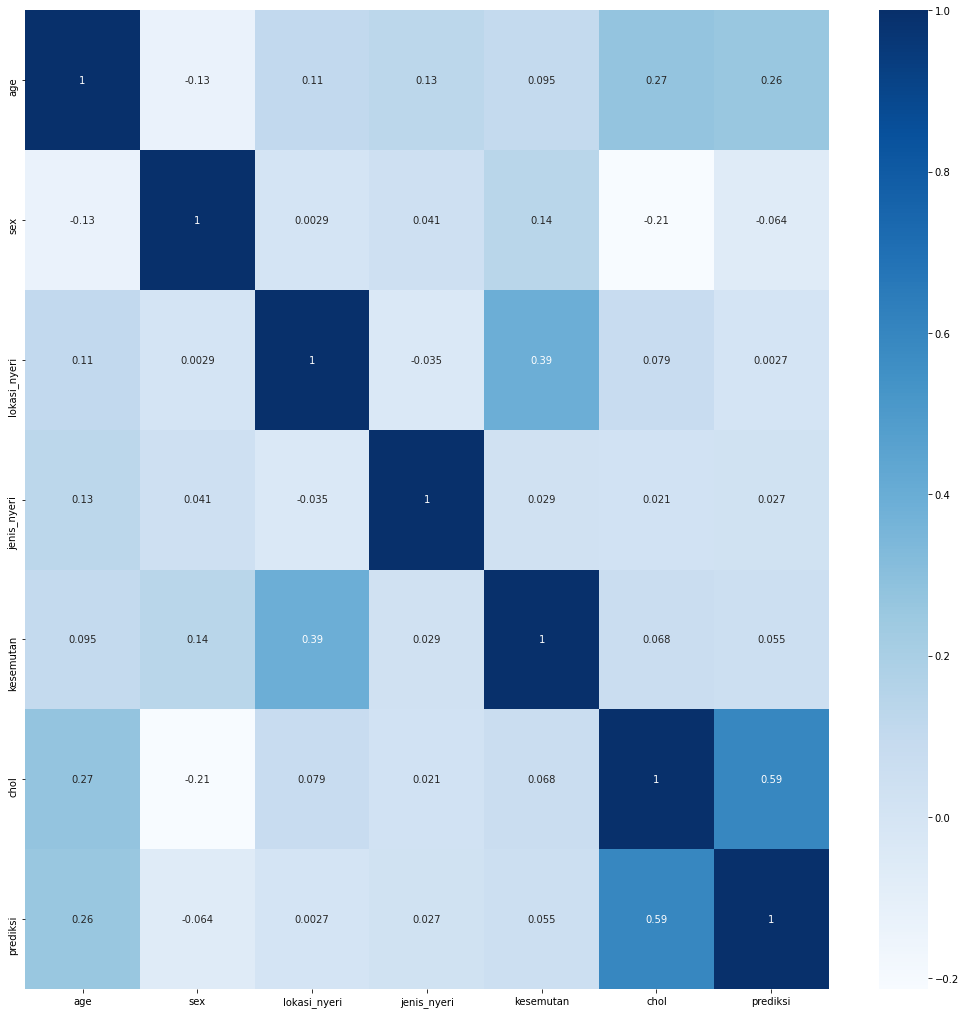

In [6]:
# correlation with heatmap

plt.figure(figsize=(18,18))
sns.heatmap(cekkol.corr(), annot= True, cmap="Blues")
plt.show()

In [7]:
# remove column

prediksi = cekkol['prediksi']
df1 = cekkol.drop('prediksi',axis = 1)
df = df1.drop('chol',axis = 1)
df

,age,sex,lokasi_nyeri,jenis_nyeri,kesemutan
0,63,1,1,1,0
1,67,1,4,0,1
2,67,1,4,0,1
3,37,1,3,0,0
4,41,0,2,0,0
...,...,...,...,...,...
305,38,1,3,0,0
306,17,1,2,0,0
307,28,1,3,0,0
308,19,1,2,0,0


In [8]:
df.shape

(310, 5)

In [9]:
df.columns

Index(['age', 'sex', 'lokasi_nyeri', 'jenis_nyeri', 'kesemutan'], dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, prediksi, test_size = 0.2, random_state = 0)

In [11]:
# train the model

model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)

# test the model

test_predict = model.predict(X_test)

# classification report and confusion matrix

print(classification_report(y_test, test_predict))
cm = np.array(confusion_matrix(y_test, test_predict))

print('Confusion Matrix :')
print(cm)

              precision    recall  f1-score   support

           0       0.09      0.10      0.10        10
           1       0.82      0.81      0.82        52

    accuracy                           0.69        62
   macro avg       0.46      0.45      0.46        62
weighted avg       0.71      0.69      0.70        62

Confusion Matrix :
[[ 1  9]
 [10 42]]


import csv
import pandas as pd
xt = pd.DataFrame(X_test)
yt = pd.DataFrame(y_test)
yp = pd.DataFrame(test_predict)

xt.to_csv("x.csv")
yt.to_csv("y.csv")
yp.to_csv("yp.csv")

In [12]:
#save the model as pickle

with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)